## Classification of wines with different algorithms of Machine Learning and choosing the best model.

# ***Target: To Explore different algorithms of ML for multi-class classification.***

## Author: Lomovtsev Pavel IMBO-01-19

## *0.* *Data preprocessing.*

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import operator

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_curve, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC 

In [ ]:
data = pd.read_csv('winequalityN.csv')

In [ ]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
data.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
X = data.drop(['quality', 'type'], axis=1)
y = data.quality

X[X.isna()] = 0

print(sum(y.isna()))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)



0


# *1. Decision tree classifier*

In [ ]:
tree = DecisionTreeClassifier(random_state=42)

In [ ]:
search = GridSearchCV(tree , param_grid={'criterion' : ['gini', 'entropy'], 'max_depth' : np.arange(1, 15)})
search.fit(X_train, y_train)
best_model = search.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
print(f'Score of Decision Tree Classifier: {best_model.score(X_test, y_test)}\nRecall: {recall_score(y_test, best_model.predict(X_test), average="macro")}\nF1-score: {f1_score(y_test, best_model.predict(X_test), average="macro")}')

Score of Decision Tree Classifier: 0.5738927738927739
Recall: 0.29356262963788293
F1-score: 0.2995060742023374


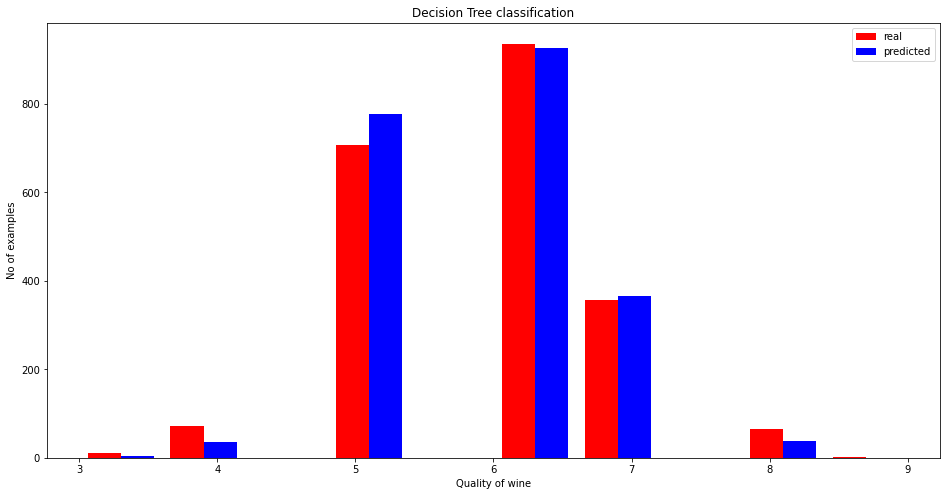

In [ ]:
plt.hist([y_test,best_model.predict(X_test)], color=['red', 'blue'])
plt.legend(['real', 'predicted'])
plt.xlabel('Quality of wine')
plt.ylabel('No of examples')
plt.title('Decision Tree classification')
plt.gcf().set_size_inches(16, 8)
plt.show()

# *2. Random Forest Classifier*

In [ ]:
random_forest = RandomForestClassifier(random_state=42)

params_rf = {'n_estimators' : np.arange(10, 20),  'max_depth' : np.arange(5, 15), 'criterion' : ['gini', 'entropy']}

search_rf = GridSearchCV(random_forest, param_grid=params_rf)

search_rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                               

In [ ]:
best_rf = search_rf.best_estimator_ 

In [ ]:
print(f'Score of Random Forest Classifier: {best_rf.score(X_test, y_test)}\nRecall: {recall_score(y_test, best_rf.predict(X_test), average="macro")}\nF1-score: {f1_score(y_test, best_rf.predict(X_test), average="macro")}')

Score of Random Forest Classifier: 0.6536130536130537
Recall: 0.33562717160668304
F1-score: 0.3642943410615888


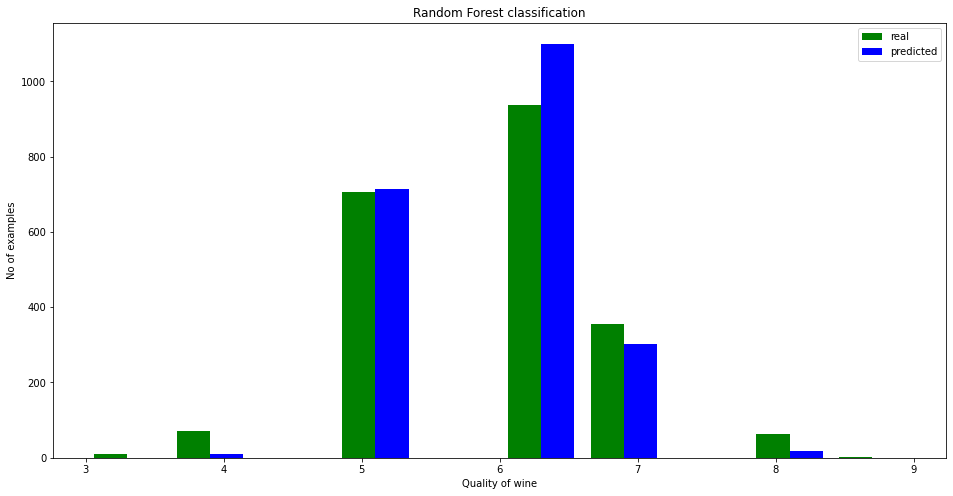

In [ ]:
plt.hist([y_test,best_rf.predict(X_test)], color=['green', 'blue'])
plt.legend(['real', 'predicted'])
plt.xlabel('Quality of wine')
plt.ylabel('No of examples')
plt.title('Random Forest classification')
plt.gcf().set_size_inches(16, 8)
plt.show()

# *3. K-nearest neighbours Classifier.*

In [ ]:
kneighbours = KNeighborsClassifier()
params_knn = {'n_neighbors' : np.arange(1,10), 'weights' : ['distance', 'uniform']}
search_knn = GridSearchCV(kneighbours, param_grid=params_knn)
search_knn.fit(X_train, y_train)

best_knn = search_knn.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
print(f'Accuracy of KNN Classifier: {accuracy_score(y_test, best_knn.predict(X_test))}\nRecall score: {recall_score(y_test, best_knn.predict(X_test), average="macro")}\nF1-score: {f1_score(y_test, best_knn.predict(X_test), average="macro")}')

Accuracy of KNN Classifier: 0.5720279720279721
Recall score: 0.30042352152444407
F1-score: 0.3138278986867631


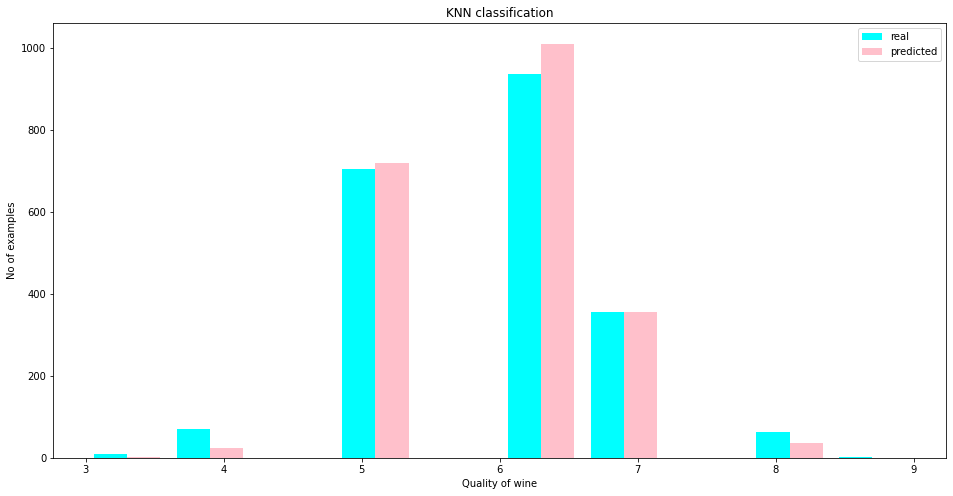

In [ ]:
plt.hist([y_test, best_knn.predict(X_test)], color=['cyan', 'pink'])
plt.title('KNN classification')
plt.xlabel('Quality of wine')
plt.ylabel('No of examples')
plt.legend(['real', 'predicted'])
plt.gcf().set_size_inches(16, 8)
plt.show()

# *4. Ridge Classifier* 
- This is the L1 - reguzarization model.

In [ ]:
ridge = RidgeClassifier(random_state=42)
search_ridge = GridSearchCV(ridge, param_grid={'alpha' : np.arange(0.1, 0.9, 0.1)})
search_ridge.fit(X_train, y_train)

best_ridge = search_ridge.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
print(f'Accuracy of Ridge Classifier: {accuracy_score(y_test, best_ridge.predict(X_test))}\nRecall score: {recall_score(y_test, best_ridge.predict(X_test), average="macro")}\nF1-score: {f1_score(y_test, best_ridge.predict(X_test), average="macro")}')

Accuracy of Ridge Classifier: 0.5431235431235432
Recall score: 0.2015756490841636
F1-score: 0.17909258761572935


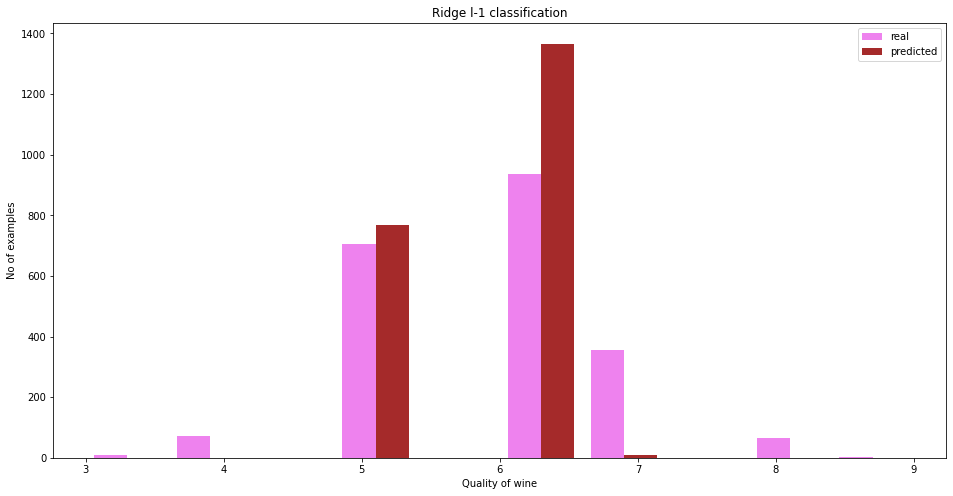

In [ ]:
plt.hist([y_test, best_ridge.predict(X_test)], color=['violet', 'brown'])
plt.title('Ridge l-1 classification')
plt.xlabel('Quality of wine')
plt.ylabel('No of examples')
plt.legend(['real', 'predicted'])
plt.gcf().set_size_inches(16, 8)
plt.show()

# *5. Neural Network*


In [ ]:
mlp = MLPClassifier(random_state=42)
search_mlp = GridSearchCV(mlp, param_grid={'hidden_layer_sizes' : [(100,), (150,), (200, )],
                                           'activation' : ['logistic', 'tahn'],
                                           'solver' : ['adam', 'lbfgs'],
                                           'batch_size' : np.arange(100, 200, 50),
                                           'max_iter' : np.arange(100, 200, 50)},
                                           )
search_mlp.fit(X_train, y_train)

best_mlp = search_mlp.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-

In [ ]:
print(f'Accuracy of KNN Classifier: {accuracy_score(y_test, best_mlp.predict(X_test))}\nRecall score: {recall_score(y_test, best_mlp.predict(X_test), average="macro")}\nF1-score: {f1_score(y_test, best_mlp.predict(X_test), average="macro")}')

Accuracy of KNN Classifier: 0.5216783216783217
Recall score: 0.20763296377613466
F1-score: 0.1864038728276404


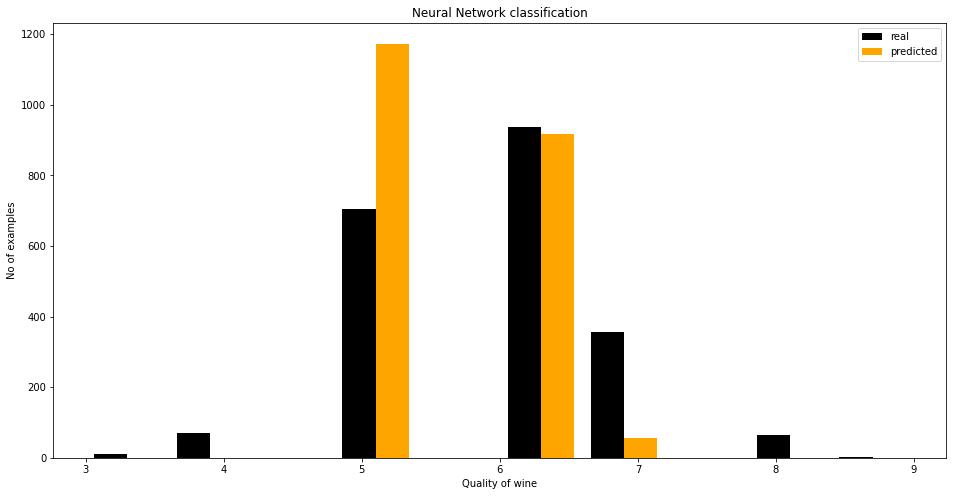

In [ ]:
plt.hist([y_test, best_mlp.predict(X_test)], color=['black', 'orange'])
plt.title('Neural Network classification')
plt.xlabel('Quality of wine')
plt.ylabel('No of examples')
plt.legend(['real', 'predicted'])
plt.gcf().set_size_inches(16, 8)
plt.show()

# *6. Naive Bayes*
--------------------------------------------------------

#*6.1. BernoulliNB* 

In [ ]:
bernoulli = BernoulliNB()

search_bernoulli = GridSearchCV(bernoulli, param_grid={'alpha' : np.arange(0.1, 1.0, 0.1),
                                                       'binarize' : np.arange(0.0, 1.0, 0.1)})

search_bernoulli.fit(X_train, y_train)

best_bernoulli = search_bernoulli.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
print(f'Accuracy of Bernoulli Classifier: {accuracy_score(y_test, best_bernoulli.predict(X_test))}\nRecall score: {recall_score(y_test, best_bernoulli.predict(X_test), average="macro")}\nF1-score: {f1_score(y_test, best_bernoulli.predict(X_test), average="macro")}')

Accuracy of Bernoulli Classifier: 0.4643356643356643
Recall score: 0.16449489289432634
F1-score: 0.14137835501122423


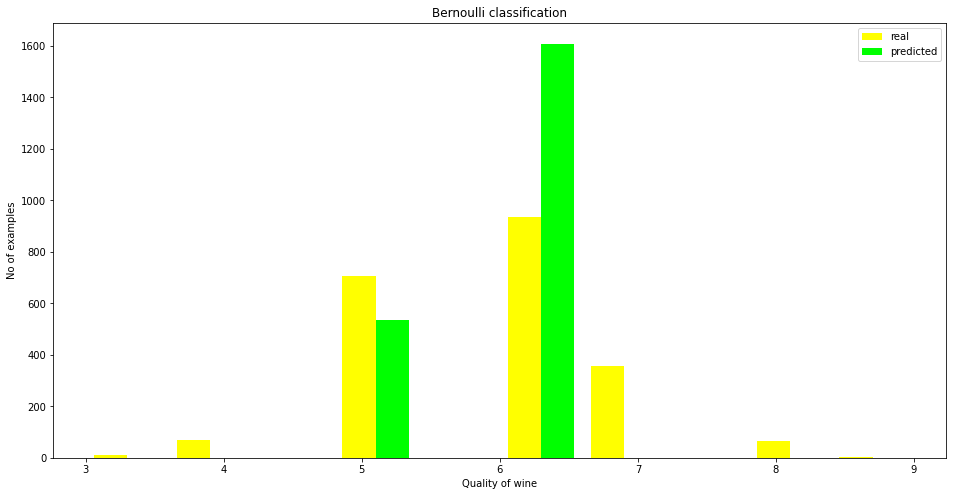

In [ ]:
plt.hist([y_test, best_bernoulli.predict(X_test)], color=['yellow', 'lime'])
plt.title('Bernoulli classification')
plt.xlabel('Quality of wine')
plt.ylabel('No of examples')
plt.legend(['real', 'predicted'])
plt.gcf().set_size_inches(16, 8)
plt.show()

# *6.2. GaussianNB*

In [ ]:
gauss = GaussianNB()
gauss.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
print(f'Accuracy of Bernoulli Classifier: {accuracy_score(y_test, gauss.predict(X_test))}\nRecall score: {recall_score(y_test, gauss.predict(X_test), average="macro")}\nF1-score: {f1_score(y_test, gauss.predict(X_test), average="macro")}')

Accuracy of Bernoulli Classifier: 0.44755244755244755
Recall score: 0.2646242399275514
F1-score: 0.25158320422685326


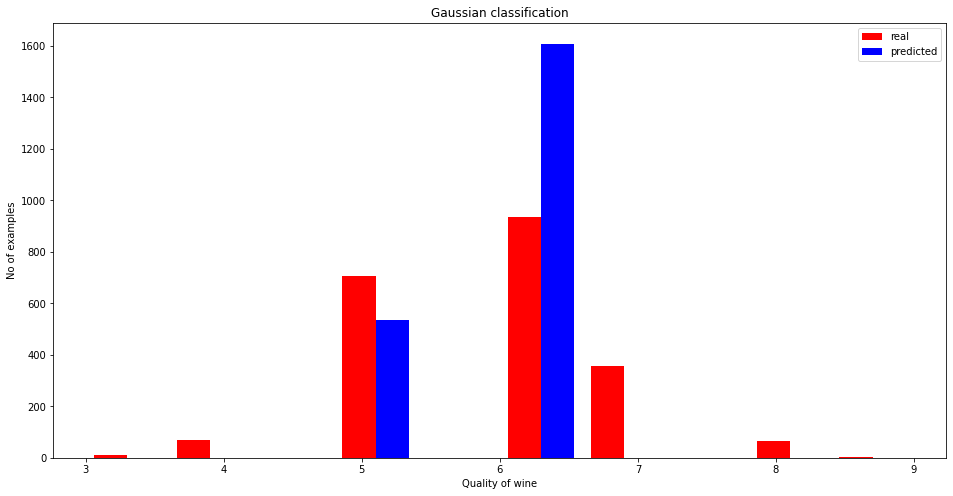

In [ ]:
plt.hist([y_test, best_bernoulli.predict(X_test)], color=['red', 'blue'])
plt.title('Gaussian classification')
plt.xlabel('Quality of wine')
plt.ylabel('No of examples')
plt.legend(['real', 'predicted'])
plt.gcf().set_size_inches(16, 8)
plt.show()

# *7. Logistic Regression*

In [ ]:
log_reg = LogisticRegression(multi_class='multinomial', random_state=42)

search_log_reg = GridSearchCV(log_reg, param_grid={'penalty' : ['l1', 'l2'],
                                                   'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                                                   })

search_log_reg.fit(X_train, y_train)

best_log_reg = search_log_reg.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train

In [ ]:
print(f'Accuracy of Logistic Regression Classifier: {accuracy_score(y_test, best_log_reg.predict(X_test))}\nRecall score: {recall_score(y_test, best_log_reg.predict(X_test), average="macro")}\nF1-score: {f1_score(y_test, best_log_reg.predict(X_test), average="macro")}')

Accuracy of Logistic Regression Classifier: 0.5445221445221445
Recall score: 0.21592824020935517
F1-score: 0.21072027531576887


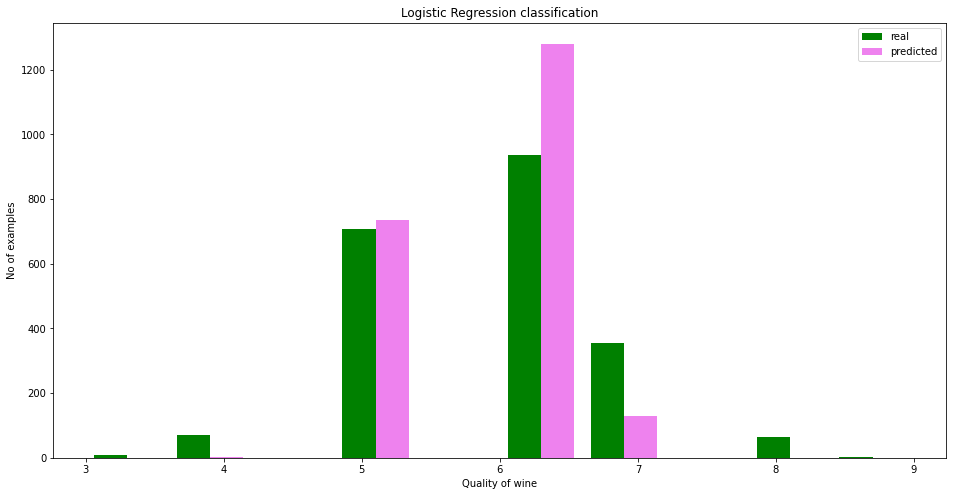

In [ ]:
plt.hist([y_test, best_log_reg.predict(X_test)], color=['green', 'violet'])
plt.title('Logistic Regression classification')
plt.xlabel('Quality of wine')
plt.ylabel('No of examples')
plt.legend(['real', 'predicted'])
plt.gcf().set_size_inches(16, 8)
plt.show()

# *8. Quadratic Discriminant Analysis*

In [ ]:
discriminant = QuadraticDiscriminantAnalysis()
search_discriminant = GridSearchCV(discriminant, param_grid={
                                                             'reg_param' : np.arange(0.0, 1.0, 0.1),
                                                             'tol' : np.arange(0.0001, 0.0010, 0.0001)})

search_discriminant.fit(X_train, y_train)

best_discriminant = search_discriminant.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are colline

In [ ]:
print(f'Accuracy of Quadratic Discriminant Classifier: {accuracy_score(y_test, best_discriminant.predict(X_test))}\nRecall score: {recall_score(y_test, best_discriminant.predict(X_test), average="macro")}\nF1-score: {f1_score(y_test, best_discriminant.predict(X_test), average="macro")}')

Accuracy of Quadratic Discriminant Classifier: 0.5235431235431235
Recall score: 0.2550422442346003
F1-score: 0.25070550715250367


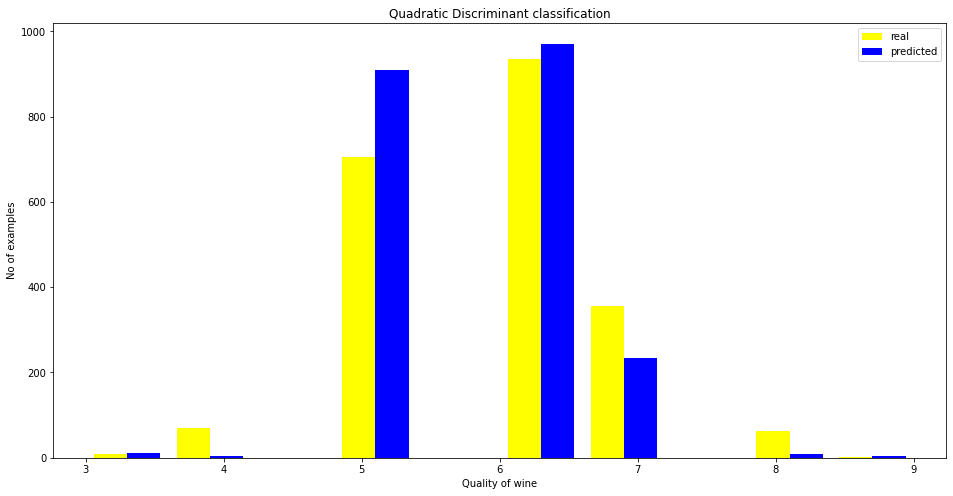

In [ ]:
plt.hist([y_test, best_discriminant.predict(X_test)], color=['yellow', 'blue'])
plt.title('Quadratic Discriminant classification')
plt.xlabel('Quality of wine')
plt.ylabel('No of examples')
plt.legend(['real', 'predicted'])
plt.gcf().set_size_inches(16, 8)
plt.show()

# *9. Linear SVC*

In [ ]:
svc = LinearSVC(random_state=123)
search_svc = GridSearchCV(svc, param_grid={'penalty' : ['l1', 'l2'],
                                           'loss' : ['hinge', 'squared_hinge'],
                                           'multi_class' : ['ovr', 'crammer_singer'],
                                           })

search_svc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWar

AttributeError: ignored

In [ ]:
best_svc = search_svc.best_estimator_
print(f'Accuracy of SVM Classifier: {accuracy_score(y_test, best_svc.predict(X_test))}\nRecall score: {recall_score(y_test, best_svc.predict(X_test), average="macro")}\nF1-score: {f1_score(y_test, best_svc.predict(X_test), average="macro")}')

Accuracy of SVM Classifier: 0.4428904428904429
Recall score: 0.146137502723905
F1-score: 0.09592115328481847


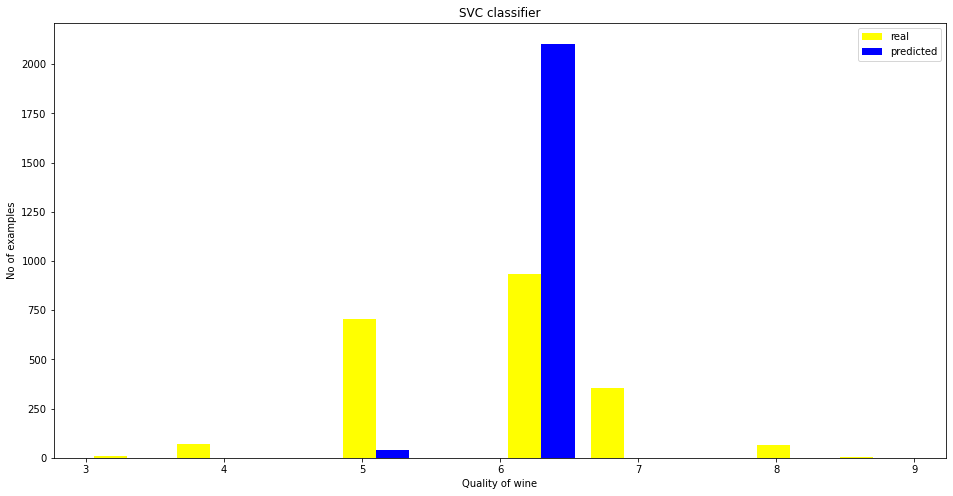

In [ ]:
plt.hist([y_test, best_svc.predict(X_test)], color=['yellow', 'blue'])
plt.title('SVC classifier')
plt.xlabel('Quality of wine')
plt.ylabel('No of examples')
plt.legend(['real', 'predicted'])
plt.gcf().set_size_inches(16, 8)
plt.show()

# *10. Choosing the best model by Accuracy-score.*

In [ ]:
models_scores = {'Decision Tree Classifier' : best_model.score(X_test,y_test),
                 'Random Forest Classifier' : best_rf.score(X_test, y_test),
                 'K-Nearest Neighbors Classifier' : best_knn.score(X_test, y_test),
                 'Ridge L1-Classifier' : best_ridge.score(X_test, y_test),
                 'Neural Network' : best_mlp.score(X_test, y_test),
                 'Bernoulli Classifier' : best_bernoulli.score(X_test, y_test),
                 'Gaussian Classifier' : gauss.score(X_test, y_test),
                 'Logistic Regression Classifier' : best_log_reg.score(X_test, y_test),
                 'Quadratic Discriminant Analysis Classifier' : best_discriminant.score(X_test, y_test),
                 'Linear Support Vector Method Classification' : best_svc.score(X_test, y_test)}

In [ ]:
THE_BEST_MODEL = max(models_scores.items(), key=operator.itemgetter(1))[0]
THE_BEST_SCORE = max(models_scores.values())

In [ ]:
print(f'The best Machine Learning Classifier for WINES QUALITIES is {THE_BEST_MODEL} with score {round(THE_BEST_SCORE*100,2)} %')

The best Machine Learning Classifier for WINES QUALITIES is Random Forest Classifier with score 65.36 %


# ***11. Conclusion***
- The best Machine Learning Classifier for WINES QUALITIES is Random Forest Classifier with score 65.36 %